# **Mall Customers Segmentation using KMeans Clustering Algorithm**

**The objective of this project was to identify different groups of customers in a mall and segment them based on their buying behavior. By using clustering techniques, I was able to create distinct groups of customers with similar characteristics, allowing businesses to better understand their customers and tailor their marketing strategies accordingly.**

### **IMPORT PACKAGES AND READ DATASET**

In [ ]:
#importing required libraries
import numpy as np #mathematical operations
import pandas as pd # To operate the dataframes
import matplotlib.pyplot as plt # To visualize
import seaborn as sb #To visualize
from sklearn.preprocessing import LabelEncoder #to convert the categorical feature to n
from sklearn.preprocessing import StandardScaler, MinMaxScaler # To scale the data
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the data
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32
249,250,Female,31,325,86


## **OUTLIERS TREATMENT IF ANY**

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID                124.50
Age                        18.75
Annual Income (k$)         54.00
Spending Score (1-100)     47.00
dtype: float64


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(208, 5)

### **DATA TYPES AND DIMENSIONS,DATA TREATMENT**

In [ ]:
#Dropping the unnecesssary feature 'CustomerID'
df = df_out.drop(['CustomerID'],axis=1)


In [ ]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,208.000000,208.000000,208.000000
mean,38.822115,64.264423,50.163462
std,13.755002,31.827923,25.962109
min,18.000000,15.000000,1.000000
25%,29.000000,42.750000,32.000000
50%,36.000000,62.000000,50.000000
75%,48.250000,78.000000,73.000000
max,70.000000,177.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  208 non-null    object
 1   Age                     208 non-null    int64 
 2   Annual Income (k$)      208 non-null    int64 
 3   Spending Score (1-100)  208 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.1+ KB


In [ ]:
#Check for null values
df_out.isnull().sum()


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#check for special characters
for i in df_out:
 v = df_out[i].value_counts()
 print(v)

## **VISUALIZATION**

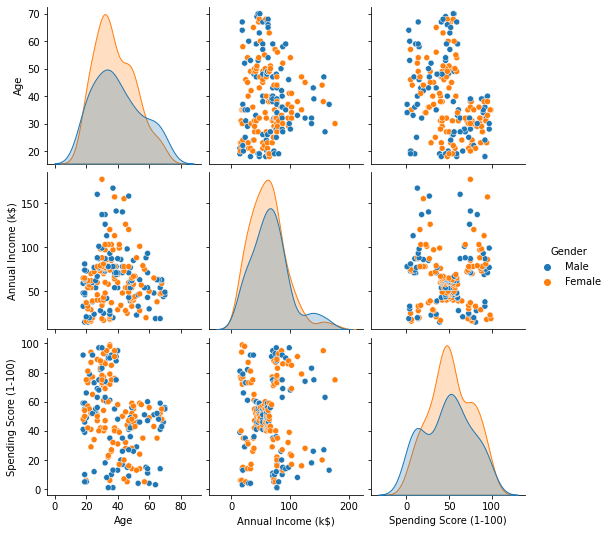

In [ ]:
sb.pairplot(df_out,hue='Gender')
#Variables effect on the 'Gender' and vice-versa.

## **UNIVARIATE ANALYSIS**

## **GENDER**

In [ ]:
v1 = df['Gender'].value_counts()
v1

Female    137
Male      113
Name: Gender, dtype: int64

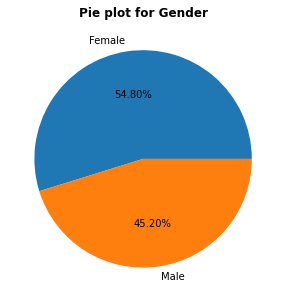

In [ ]:
label = v1.index
#pie plot for gender
plt.figure(figsize=(10,5))
plt.pie(v1, labels=label, autopct='%.2f%%')
plt.title('Pie plot for Gender',fontweight='bold',size=12)
plt.show()

**Interpretation:-**
 * **There are more 'Female' customers that is 54.80% compared to 'Male' customers that is 45.20% in the given data**. 


## **AGE**

In [ ]:
#plot for age
df.Age.min()


18

In [ ]:
#plot for age
df.Age.max()


70

In [ ]:
range = [18,20,30,40,50,60,70]


Text(0.5, 1.0, 'Histplot for Age')

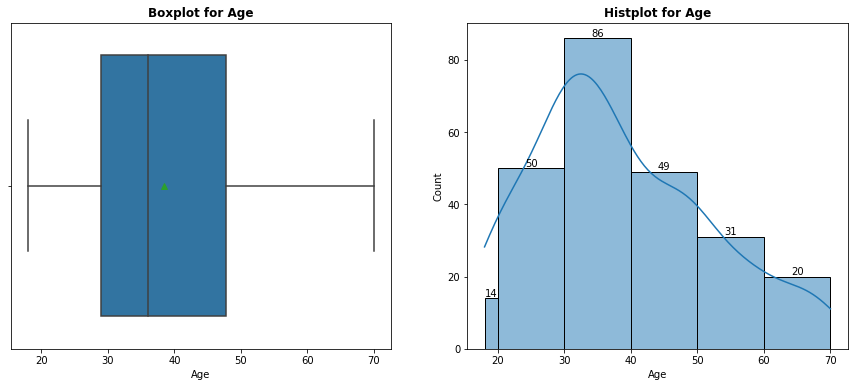

In [ ]:
#plotting for the age group
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sb.boxplot(x='Age',data=df,showmeans=True)
plt.title('Boxplot for Age',fontweight='bold',size=12)
plt.subplot(122)
ax = sb.histplot(data=df,x='Age',bins=range,kde=True)
for container in ax.containers:
 ax.bar_label(container)
plt.title('Histplot for Age',fontweight='bold',size=12)

**Interpretation:-**
* **The Mean is greater than Median so, the distribution is skewed to the right**.
* **No outliers found in the given feature**.
* **The customers with Age group between 30-40 are more in numbers followed by age group between 20-30**.


In [ ]:
q = df['Age'].quantile(0.9)
m = df['Age'].mean()
print(f'90% of the data lies before Age {q}\n')
print(f'Mean of the data lies at {m}\n')

90% of the data lies before Age 58.099999999999994

Mean of the data lies at 38.492



## **Annual Income (k$)**


In [ ]:
df['Annual Income (k$)'].min()


15

In [ ]:
df['Annual Income (k$)'].max()


177

In [ ]:
inc_range=[15,20,40,60,80,100,120,140,177]


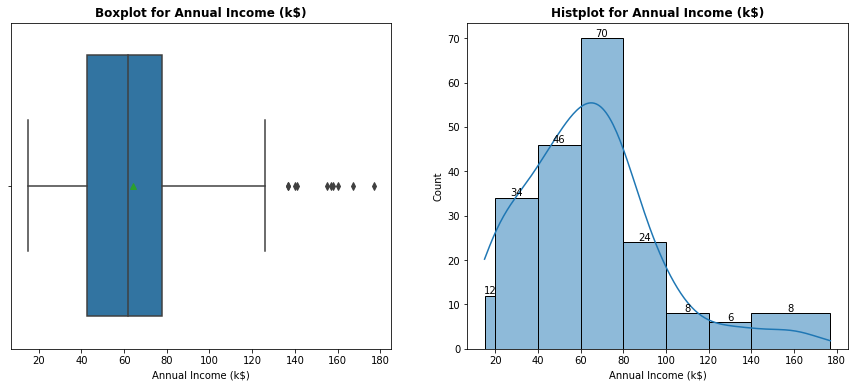

In [ ]:
#plotting for the Annual Income(K$) group
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sb.boxplot(x='Annual Income (k$)',data=df,showmeans=True)
plt.title('Boxplot for Annual Income (k$)',fontweight='bold',size=12)
plt.subplot(122)
ax1 = sb.histplot(data=df,x='Annual Income (k$)',bins=inc_range,kde=True)
for container in ax1.containers:
 ax1.bar_label(container)
plt.title('Histplot for Annual Income (k$)',fontweight='bold',size=12)
plt.show()

**Interpretation:-**
* **The Mean is less than Median so, the distribution is skewed to the Left**.
* **More than 4 outliers found in the given feature.**
* **The customers with Annual Income (k$) between 60-80 are more in numbers followed by age group between 40-60**.


In [ ]:
q1 = df['Annual Income (k$)'].quantile(0.9)
m1 = df['Annual Income (k$)'].mean()
print(f'90% of the data lies before Annual income (k$) {q1}\n')
print(f'Mean of the data lies at {m1}\n')

90% of the data lies before Annual income (k$) 101.0

Mean of the data lies at 64.26442307692308



### **Spending Score (1-100)**

In [ ]:
df['Spending Score (1-100)'].min()


1

In [ ]:
df['Spending Score (1-100)'].max()


99

In [ ]:
sc_range = [1,10,20,30,40,50,60,70,80,90,99]


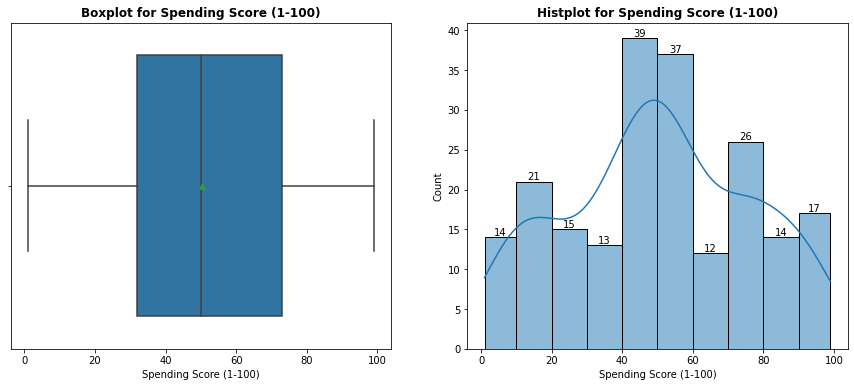

In [ ]:
#plotting for the Spending Score(1-100) group
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sb.boxplot(x='Spending Score (1-100)',data=df,showmeans=True)
plt.title('Boxplot for Spending Score (1-100)',fontweight='bold',size=12)
plt.subplot(122)
ax2 = sb.histplot(data=df,x='Spending Score (1-100)',bins=sc_range,kde=True)
for container in ax2.containers:
 ax2.bar_label(container)
plt.title('Histplot for Spending Score (1-100)',fontweight='bold',size=12)
plt.show()


**Interpretation:-**
* **The Mean is Greater than Median so, the distribution is skewed to the right**.
* **No outliers found in the given feature.**
* **The customers with Spending Score (1-100) between 40-50 are more in numbers followed by age group between 50-60**.
* **The data is not distributed Normally**. 

In [ ]:
q2 = df['Spending Score (1-100)'].quantile(0.9)
m2 = df['Spending Score (1-100)'].mean()
print(f'90% of the data lies before Spending Score (1-100) {q2}\n')
print(f'Mean of the data lies at {m2}\n')

90% of the data lies before Spending Score (1-100) 87.30000000000001

Mean of the data lies at 50.16346153846154



## **BIVARIATE ANALYSIS**

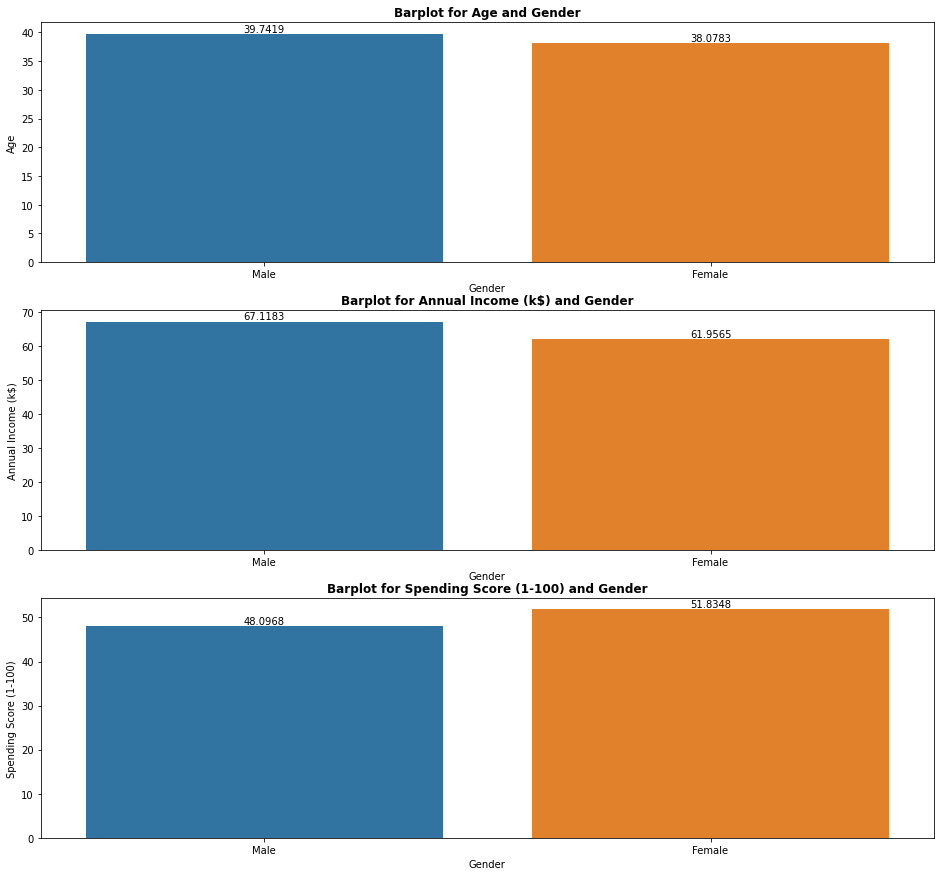

In [ ]:
#plotting for Age and Gender
plt.subplots(3,1,figsize=(16,15))
plt.subplot(311)
ax3 = sb.barplot(data=df,y='Age',x='Gender',ci=None)
for container in ax3.containers:
 ax3.bar_label(container)
plt.title('Barplot for Age and Gender',fontweight='bold',size=12)
plt.subplot(312)
ax4 = sb.barplot(data=df,y='Annual Income (k$)',x='Gender',ci=None)
for container in ax4.containers:
 ax4.bar_label(container)
plt.title('Barplot for Annual Income (k$) and Gender',fontweight='bold',size=12)
plt.subplot(313)
ax5 = sb.barplot(data=df,y='Spending Score (1-100)',x='Gender',ci=None)
for container in ax5.containers:
 ax5.bar_label(container)
plt.title('Barplot for Spending Score (1-100) and Gender',fontweight='bold',size=12)
plt.show()

**Interpretation:-**
 
 **For the Gender of 'Male' customers the average 'Age' is more than Female
customers**. 

*   **For the Gender of 'Male' customers the average 'Age' is more than Female
customers**.

* **For the Male customers the Average Annual Income (K$) is more than the female customers**
*  **For the Female customers the average Spending score is more than the Male
customers**. 


## **MULTIVARIATE ANALYSIS**

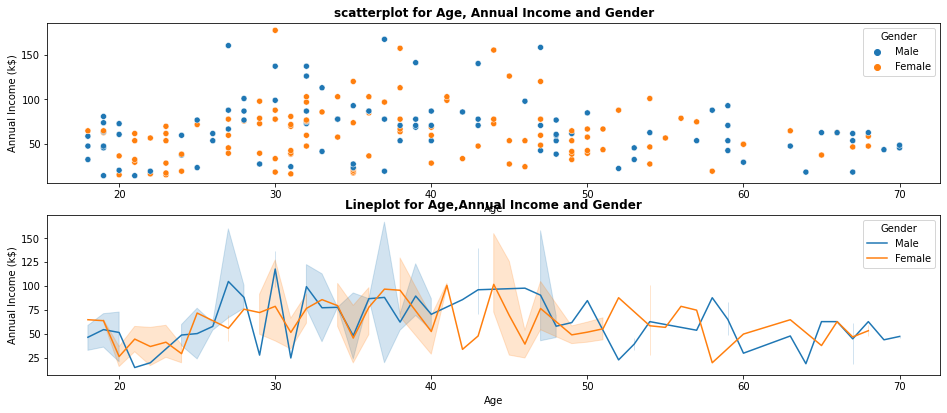

In [ ]:
plt.subplots(2,1,figsize=(16,10))
plt.subplot(311)
sb.scatterplot(data=df,x='Age',y='Annual Income (k$)',hue='Gender')
plt.title('scatterplot for Age, Annual Income and Gender',fontweight='bold',size=12)
plt.subplot(312)
sb.lineplot(data=df,x='Age',y='Annual Income (k$)',hue='Gender')
plt.title('Lineplot for Age,Annual Income and Gender',fontweight='bold',size=12)
plt.show()

**Interpretation:-**
* **The Annual Income is more at the Age of 30 for the customer of Male Gender.**
* **The Annual Income is more at the Age of 41 for the customer of Female Gender**


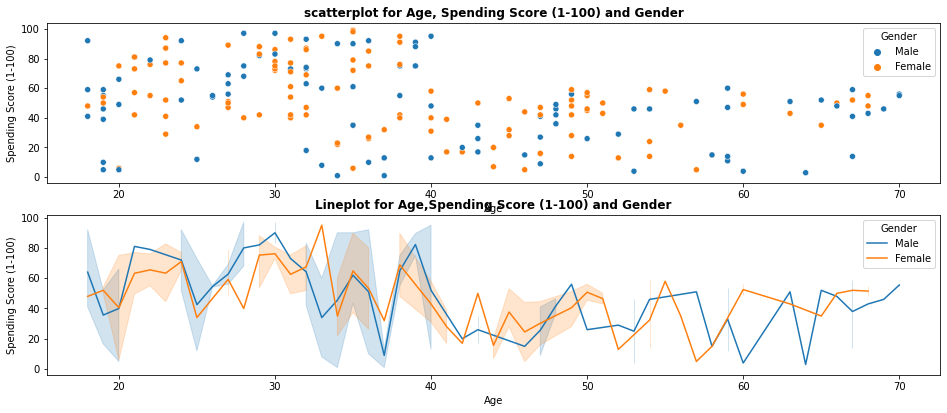

In [ ]:
plt.subplots(2,1,figsize=(16,10))
plt.subplot(311)
sb.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
plt.title('scatterplot for Age, Spending Score (1-100) and Gender',fontweight='bold',size=12)
plt.subplot(312)
sb.lineplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
plt.title('Lineplot for Age,Spending Score (1-100) and Gender',fontweight='bold',size=12)
plt.show()

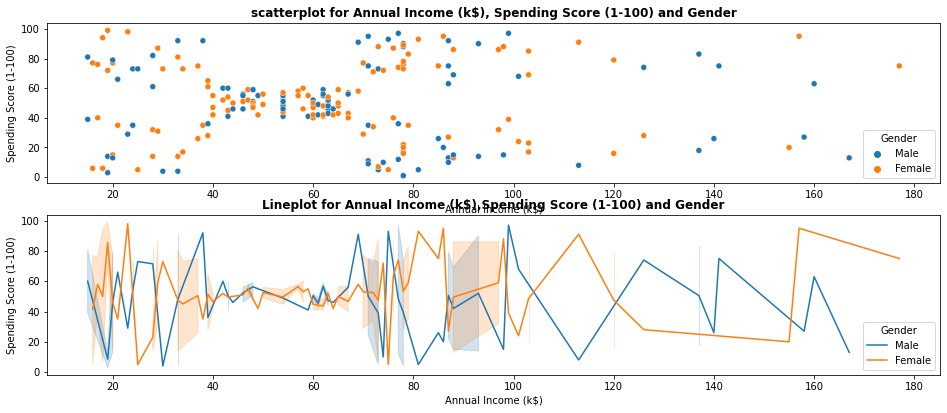

In [ ]:
plt.subplots(2,1,figsize=(16,10))
plt.subplot(311)
sb.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender')
plt.title('scatterplot for Annual Income (k$), Spending Score (1-100) and Gender',fontweight='bold',size=12)
plt.subplot(312)
sb.lineplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender')
plt.title('Lineplot for Annual Income (k$),Spending Score (1-100) and Gender',fontweight='bold',size=12)
plt.show()


## **DATA PREPROCESSING**

In [ ]:
#converting the object column to category
df['Gender'] = df['Gender'].astype('category')


In [ ]:
#checking for info after converting object feature to category
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  208 non-null    category
 1   Age                     208 non-null    int64   
 2   Annual Income (k$)      208 non-null    int64   
 3   Spending Score (1-100)  208 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 6.8 KB


In [ ]:
#converting category column to numerical using labelencoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
#after converting to numeriical checking for info
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  208 non-null    int64
 1   Age                     208 non-null    int64
 2   Annual Income (k$)      208 non-null    int64
 3   Spending Score (1-100)  208 non-null    int64
dtypes: int64(4)
memory usage: 8.1 KB


## **SCALING**

In [ ]:
#scaling the data using standardscaler
scaler = StandardScaler()
numerics = ['int16','int32','int64']
new_df1 = df.select_dtypes(include=numerics)
scaled_df1 = pd.DataFrame(scaler.fit_transform(new_df1.to_numpy()),columns=new_df1.columns)
scaled_df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.112007,-1.444561,-1.551571,-0.431028
1,1.112007,-1.298808,-1.551571,1.190617
2,-0.899275,-1.371685,-1.520076,-1.705178
3,-0.899275,-1.153056,-1.520076,1.036175
4,-0.899275,-0.570046,-1.488581,-0.392417
...,...,...,...,...
203,-0.899275,-0.059913,2.920684,1.731166
204,1.112007,0.595973,2.952179,-0.894355
205,1.112007,-0.861551,3.015168,0.495626
206,1.112007,-0.132789,3.235632,-1.434903


In [ ]:
#finding the correlation
v = scaled_df1.corr()
v

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060281,0.080828,-0.071759
Age,0.060281,1.000000,-0.019302,-0.328348
Annual Income (k$),0.080828,-0.019302,1.000000,0.004946
Spending Score (1-100),-0.071759,-0.328348,0.004946,1.000000


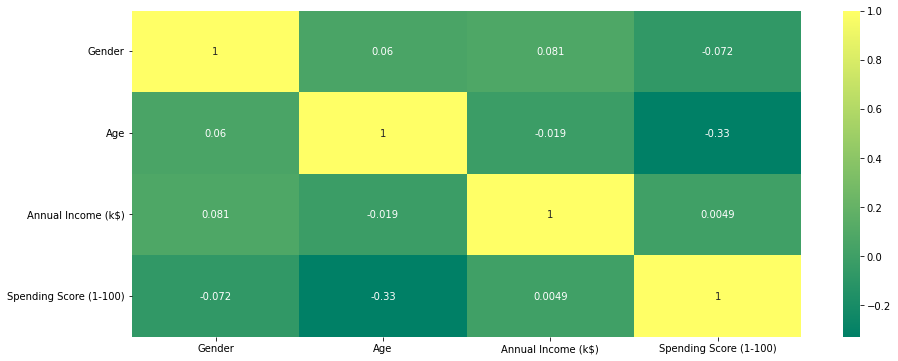

In [ ]:
#plotting the heatmap
plt.figure(figsize=(15,6))
sb.heatmap(v,annot=True,cmap='summer')
plt.show()


## **K-MEANS CLUSTERING**

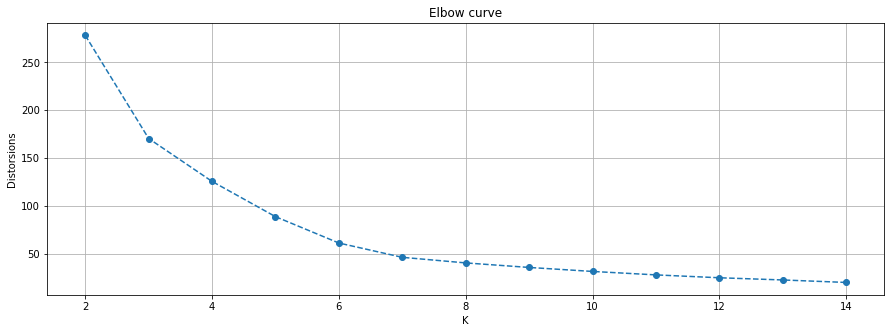

In [ ]:
#finding optimum k values
distorsions = []
for k in range(2, 15):
 kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10)
 kmeans.fit(scaled_df1.iloc[:,2:])
 distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions,'o--')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');


**Optimal 'k' around 6-7 from the elbow method**
**Let'cross check for the optimal 'k' by calculating Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score
clusters_range = np.arange(2,10)

In [ ]:
for cluster in clusters_range:
 kmeans = KMeans(n_clusters=cluster,init='k-means++',max_iter=300,n_init=10)
 kmeans.fit_predict(scaled_df1.iloc[:,2:])
 score = silhouette_score(scaled_df1.iloc[:,2:], kmeans.labels_, metric='euclidean')
 print(f'for cluster: {cluster} --> Silhouette Score: %.3f' % score)

for cluster: 2 --> Silhouette Score: 0.304
for cluster: 3 --> Silhouette Score: 0.454
for cluster: 4 --> Silhouette Score: 0.476
for cluster: 5 --> Silhouette Score: 0.524
for cluster: 6 --> Silhouette Score: 0.545
for cluster: 7 --> Silhouette Score: 0.556
for cluster: 8 --> Silhouette Score: 0.462
for cluster: 9 --> Silhouette Score: 0.470


**The silhouette score of 1 means that the clusters are very dense and 
nicely separated**.  
**Considering the k=7 based on the elbow curve and silhouttee score.**

In [ ]:
#model building
model = KMeans(n_clusters=7)
model.fit(df)


KMeans(n_clusters=7)

In [ ]:
labels = model.fit_predict(scaled_df1.iloc[:,2:])
labels


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5], dtype=int32)

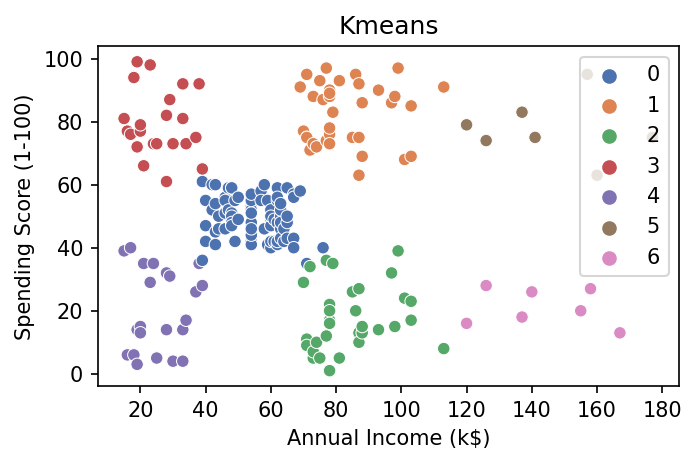

In [ ]:
plt.figure(figsize=(5,3),dpi=150)
sb.scatterplot(x=df.iloc[:,2],y=df.iloc[:,3],hue=labels,palette=sb.color_palette('deep'))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Kmeans')
plt.show()


### **CUSTOMER SEGMENTATION BASED ON THE ANNUAL INCOME AND SPENDING SCORE AS PER K-MEANS CLUSTERING**

In [ ]:
df['cluster'] = labels

In [ ]:
for cluster in df.cluster.unique():
 if cluster == 2 : name = 'Average Income but Less Spending Scores Customers!'
 elif cluster == 1 : name = 'Average Income and High Spending Scores Customers!:'
 elif cluster == 3 : name = 'Low Income and High Spending Scores Customers!'
 elif cluster == 0 : name = 'High Income but Less Spending Scores Customers!:'
 elif cluster == 4 : name = 'Low Income and Low Spending Scores Customers!'
 elif cluster == 5 : name = 'High Income and High Spending Scores Customers!'
 elif cluster == 6 : name = 'High Income and Low Spending Scores Customers!'
 a = df[df.cluster == cluster]['Spending Score (1-100)']
 print(f'{name} :\n {a.unique()}\n')

Low Income and Low Spending Scores Customers! :
 [39  6 40  3 14 15 13 35 29  5 32 31  4 17 26 28]

Low Income and High Spending Scores Customers! :
 [81 77 76 94 72 99 79 66 98 73 82 61 87 92 75 65]

High Income but Less Spending Scores Customers!: :
 [36 61 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49 53 44 57 58 40 43 35]

Average Income and High Spending Scores Customers!: :
 [91 77 95 75 71 88 73 72 93 87 97 74 90 76 89 78 83 63 92 86 69 68 85]

Average Income but Less Spending Scores Customers! :
 [29 11  9 34  5  7 10 12 36 22 17 20 16  1 35 26 27 13 15 14 32 39 24 23
  8]

High Income and Low Spending Scores Customers! :
 [16 28 18 26 20 27 13]

High Income and High Spending Scores Customers! :
 [79 74 83 75 95 63]



### **SUMMARY**

**The resulting clusters provided valuable insights into customer behavior, such as identifying high-spending customers, frequent visitors, and potential target audiences. By understanding the characteristics of different customer groups, businesses can develop more effective marketing strategies, resulting in increased revenue and customer satisfaction**.